# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The E-Commerce Sales Dataset](https://www.kaggle.com/datasets/datacodex/e-commerce-sales-data/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

/kaggle/input/e-commerce-sales-data/ecommerce_sales_data.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('/kaggle/input/e-commerce-sales-data/ecommerce_sales_data.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


## last Five row

In [4]:
df.tail()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
3495,2023-02-15,Monitor,Accessories,North,4,4064,771.16
3496,2022-09-18,Monitor,Accessories,East,1,1117,119.89
3497,2022-04-12,Laptop,Electronics,South,4,260,66.02
3498,2022-01-18,Printer,Office,South,3,222,50.28
3499,2024-11-01,Smartwatch,Electronics,East,9,10530,1777.32


## Shape of our dataset

In [5]:
df.shape

(3500, 7)

## List out all columns

In [6]:
df.columns

Index(['Order Date', 'Product Name', 'Category', 'Region', 'Quantity', 'Sales',
       'Profit'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

Order Date       object
Product Name     object
Category         object
Region           object
Quantity          int64
Sales             int64
Profit          float64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


## Check Null Value

In [9]:
df.isnull().sum()

Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

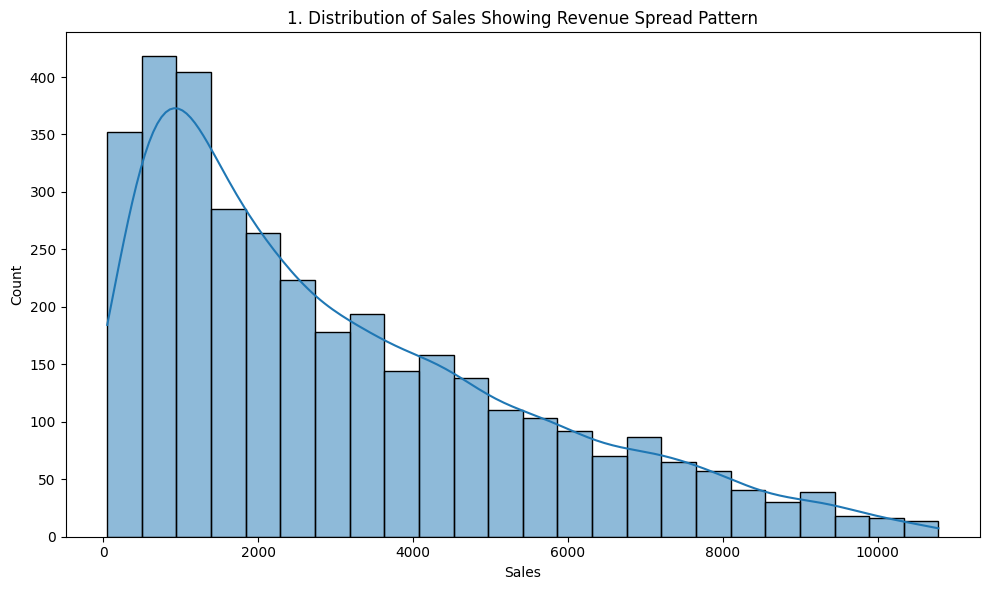

In [13]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Sales'], kde=True)
plt.title(f'{plot_no}. Distribution of Sales Showing Revenue Spread Pattern')
show_fig()
plot_no += 1

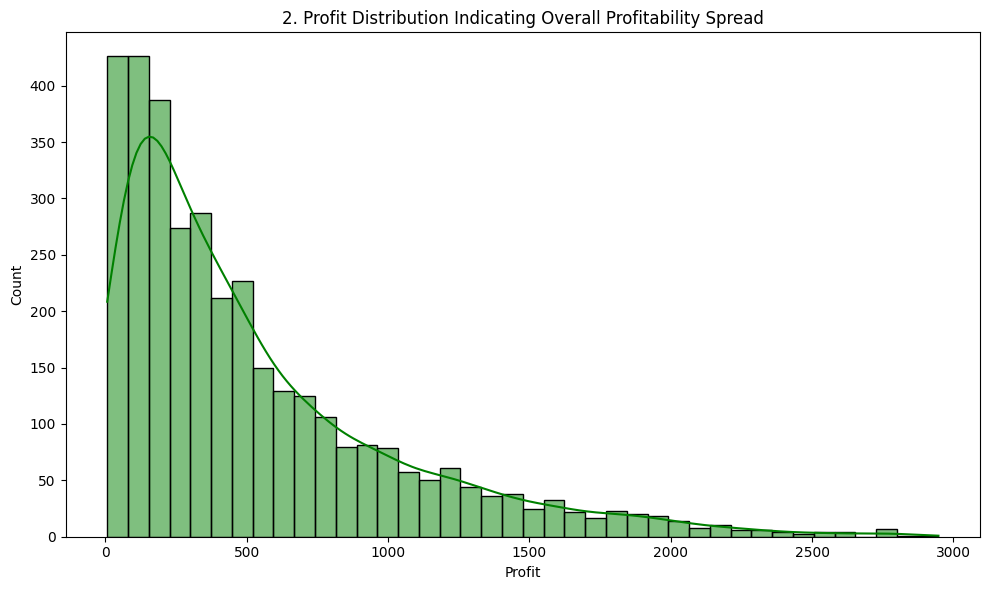

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Profit'], kde=True, color='green')
plt.title(f'{plot_no}. Profit Distribution Indicating Overall Profitability Spread')
show_fig()
plot_no += 1

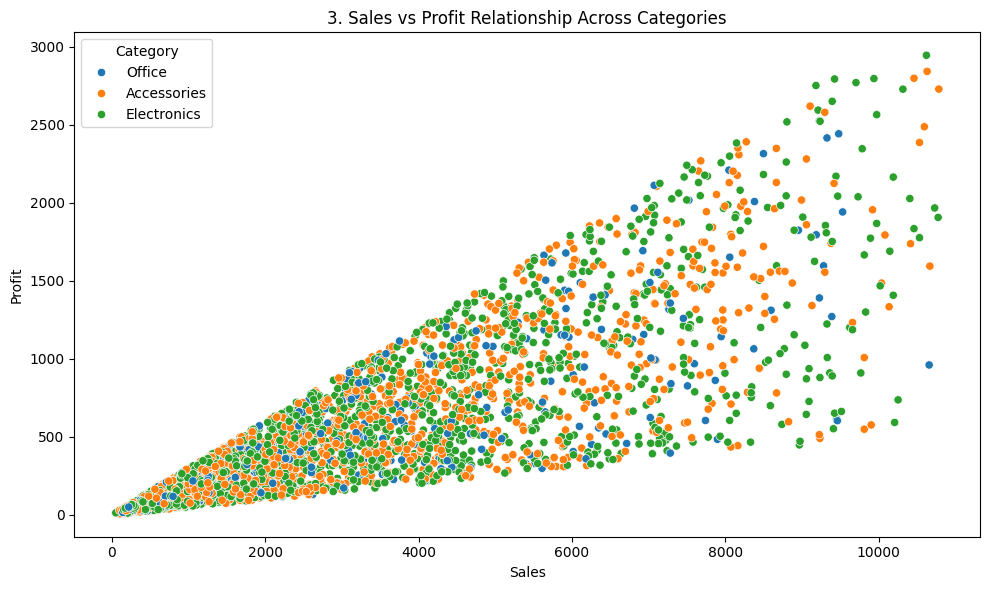

In [15]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title(f'{plot_no}. Sales vs Profit Relationship Across Categories')
show_fig()
plot_no += 1

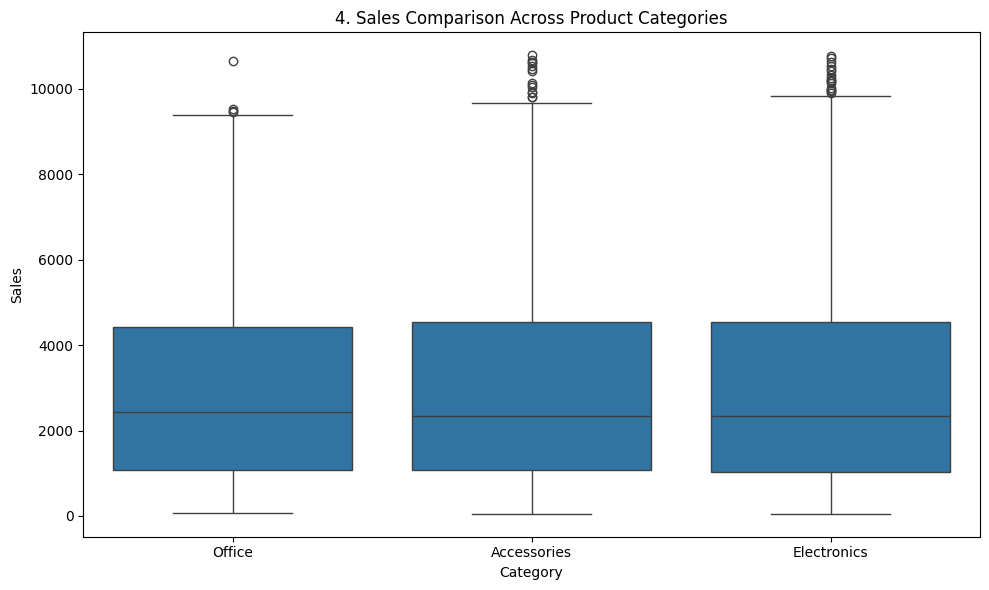

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Category', y='Sales')
plt.title(f'{plot_no}. Sales Comparison Across Product Categories')
show_fig()
plot_no += 1

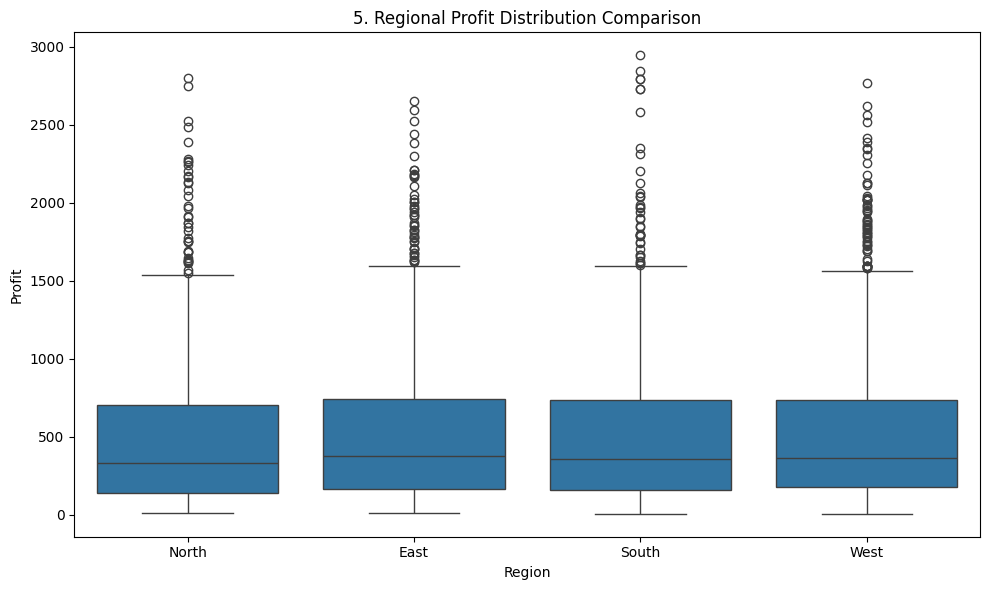

In [17]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Region', y='Profit')
plt.title(f'{plot_no}. Regional Profit Distribution Comparison')
show_fig()
plot_no += 1

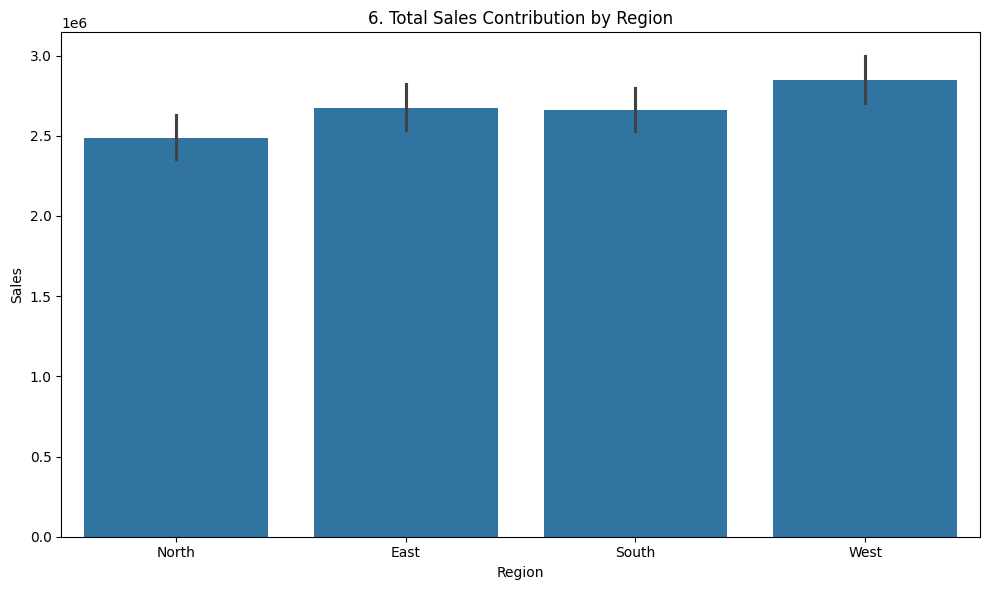

In [18]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Sales', estimator=sum)
plt.title(f'{plot_no}. Total Sales Contribution by Region')
show_fig()
plot_no += 1

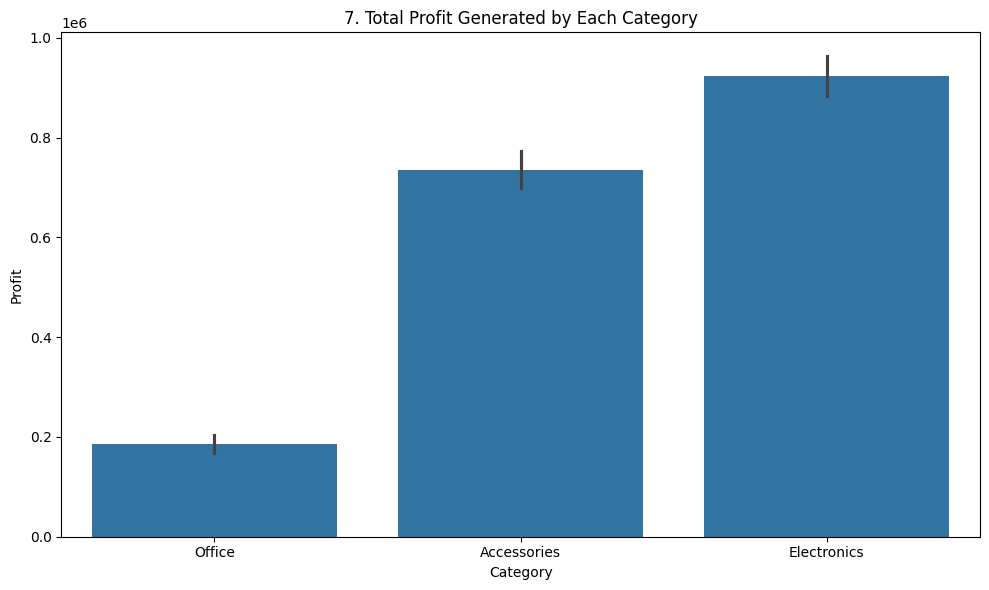

In [19]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category', y='Profit', estimator=sum)
plt.title(f'{plot_no}. Total Profit Generated by Each Category')
show_fig()
plot_no += 1

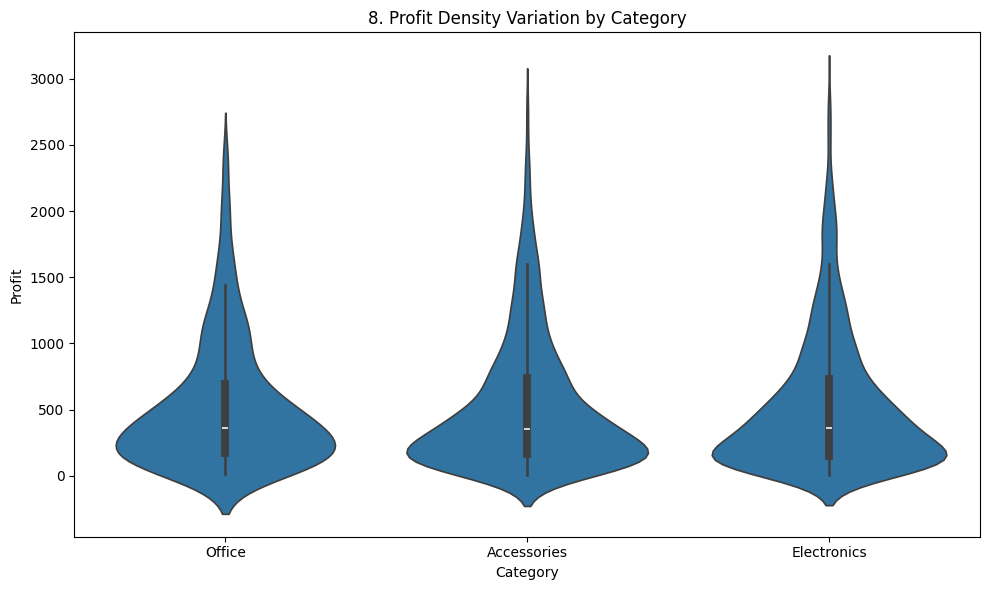

In [20]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Category', y='Profit')
plt.title(f'{plot_no}. Profit Density Variation by Category')
show_fig()
plot_no += 1

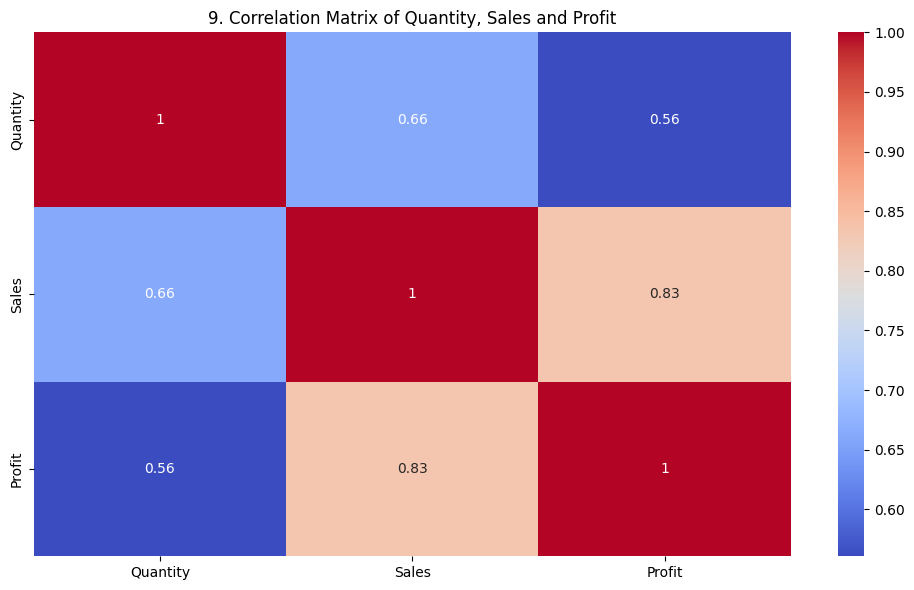

In [21]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df[['Quantity','Sales','Profit']].corr(), annot=True, cmap='coolwarm')
plt.title(f'{plot_no}. Correlation Matrix of Quantity, Sales and Profit')
show_fig()
plot_no += 1

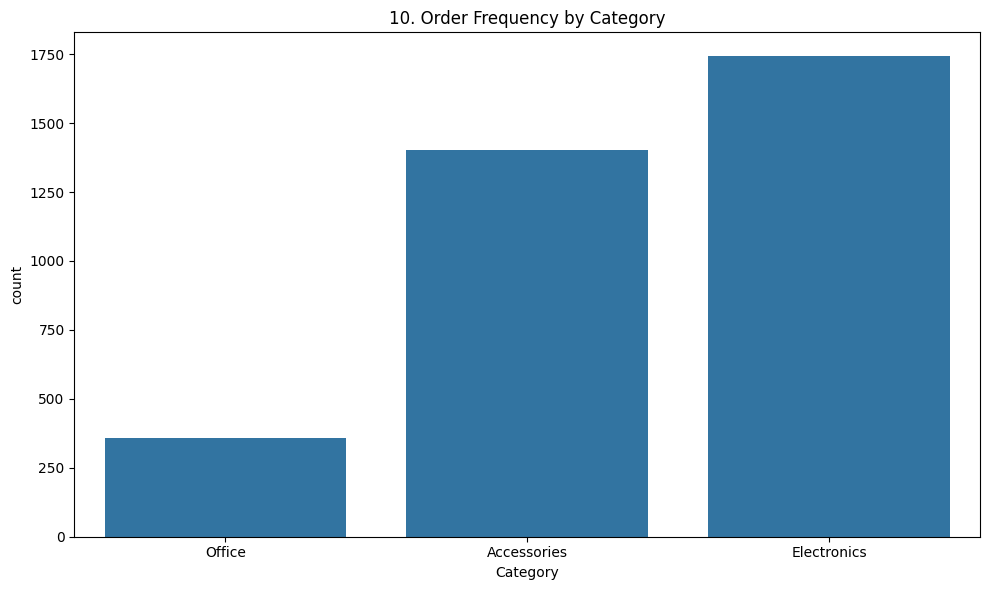

In [22]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Category')
plt.title(f'{plot_no}. Order Frequency by Category')
show_fig()
plot_no += 1

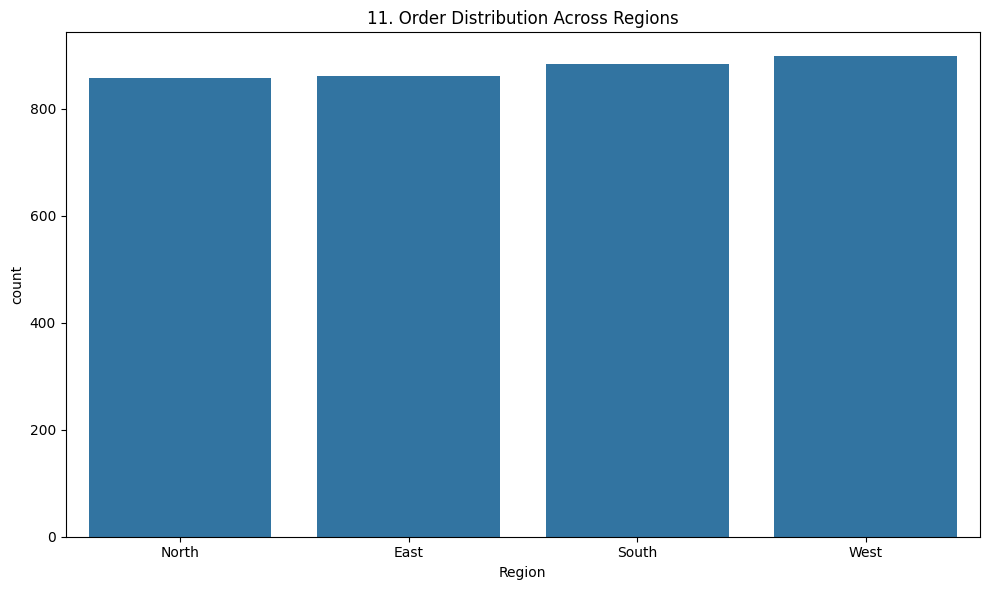

In [23]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Region')
plt.title(f'{plot_no}. Order Distribution Across Regions')
show_fig()
plot_no += 1

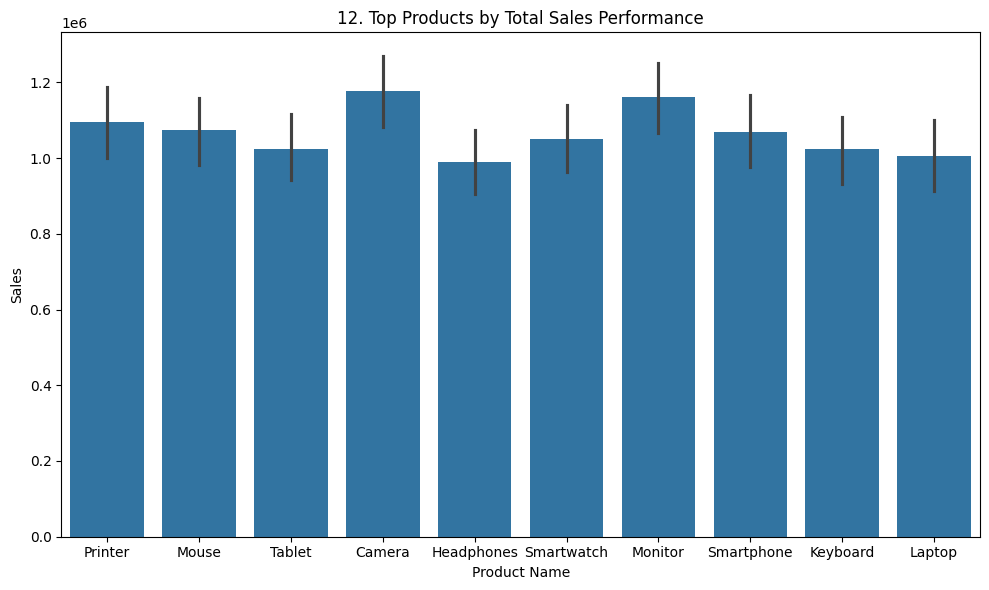

In [24]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Product Name', y='Sales', estimator=sum)
plt.title(f'{plot_no}. Top Products by Total Sales Performance')
show_fig()
plot_no += 1

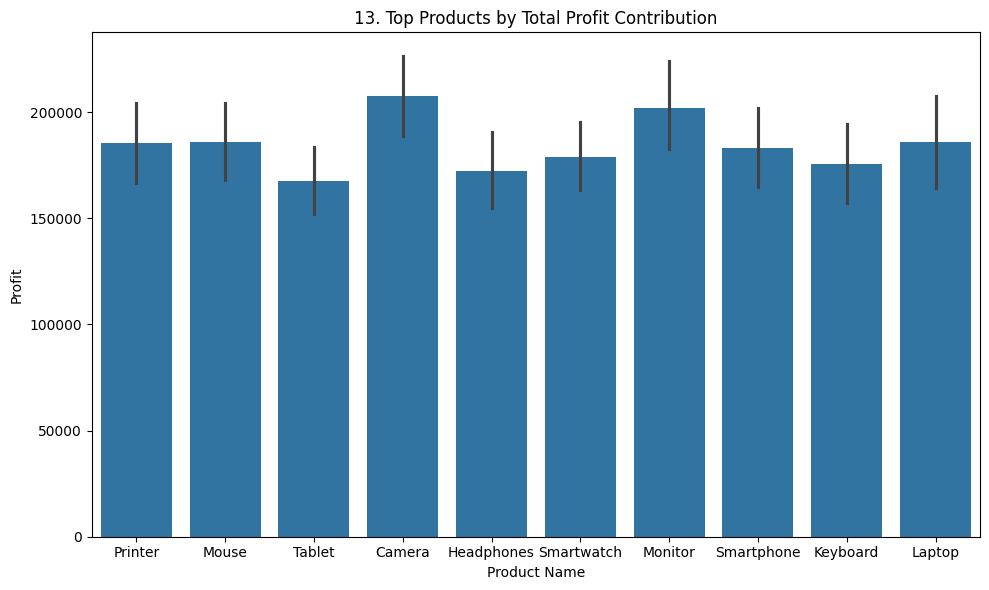

In [25]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Product Name', y='Profit', estimator=sum)
plt.title(f'{plot_no}. Top Products by Total Profit Contribution')
show_fig()
plot_no += 1

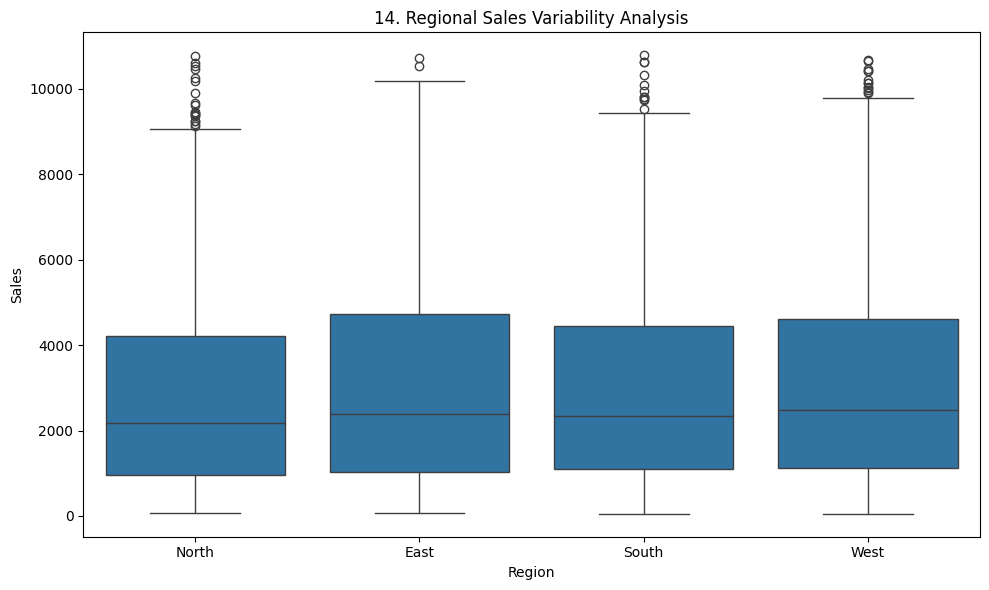

In [26]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Region', y='Sales')
plt.title(f'{plot_no}. Regional Sales Variability Analysis')
show_fig()
plot_no += 1

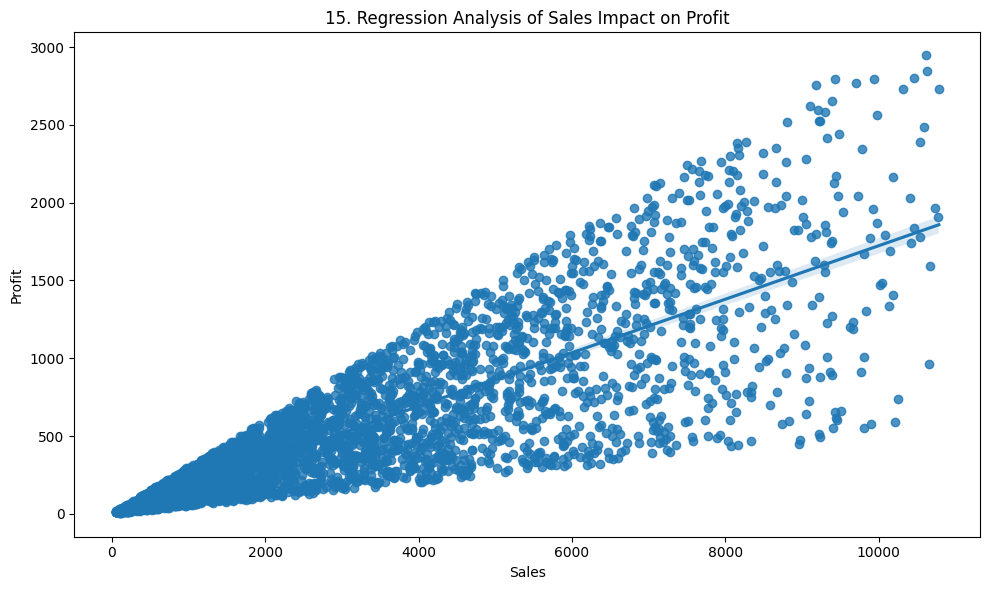

In [27]:
fig = plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Sales', y='Profit')
plt.title(f'{plot_no}. Regression Analysis of Sales Impact on Profit')
show_fig()
plot_no += 1

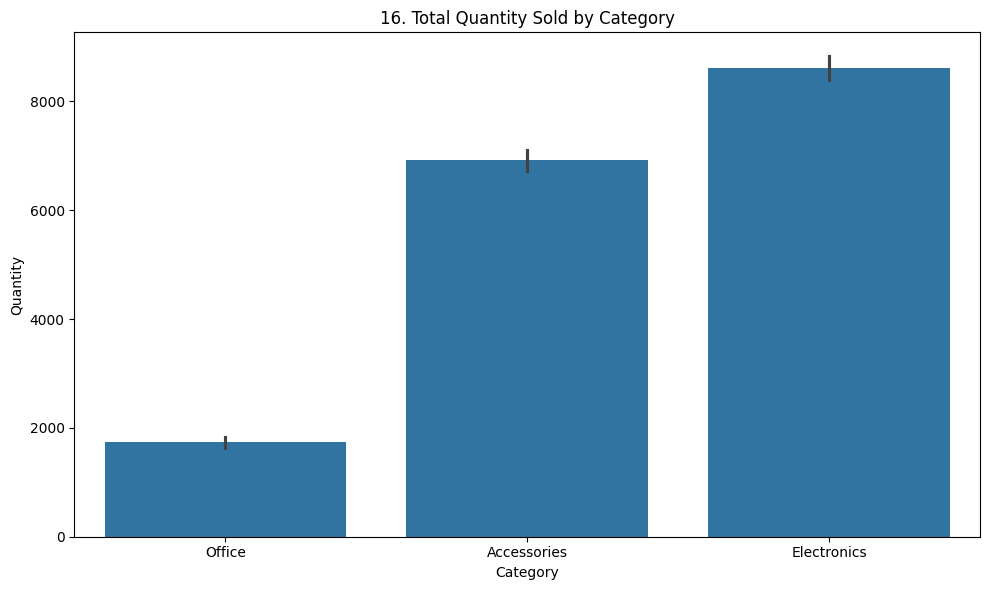

In [28]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category', y='Quantity', estimator=sum)
plt.title(f'{plot_no}. Total Quantity Sold by Category')
show_fig()
plot_no += 1

# Model Training

## Convert Order Date to datetime and extract useful features

In [29]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

## Create target variable

In [30]:
df['High_Profit'] = (df['Profit'] > df['Profit'].median()).astype(int)

## Encode categorical columns

In [31]:
le_product = LabelEncoder()
le_category = LabelEncoder()
le_region = LabelEncoder()

df['Product Name'] = le_product.fit_transform(df['Product Name'])
df['Category'] = le_category.fit_transform(df['Category'])
df['Region'] = le_region.fit_transform(df['Region'])

## Define features and target

In [32]:
X = df[['Product Name','Category','Region','Quantity','Sales','Year','Month']]
y = df['High_Profit']

## Split dataset into train and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale numerical features

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train Logistic Regression model

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Make predictions

In [36]:
y_pred = model.predict(X_test)

## Print accuracy score

In [37]:
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.8514285714285714


## Plot confusion matrix

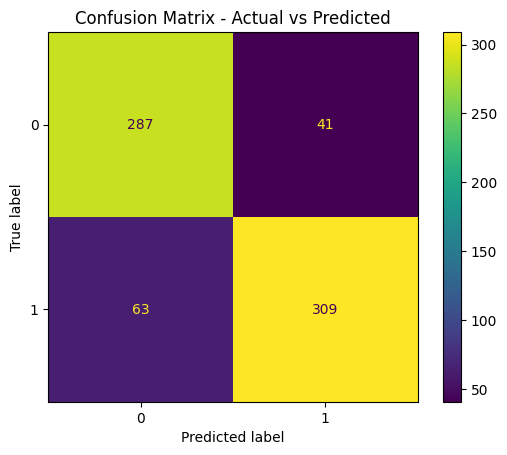

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Actual vs Predicted")
plt.show()